# Pandas Deep Dive

This notebook is attempting to do a few things. Ultimately, this is meant to be a deep dive of issues in Pandas. However, to make this notebook accessible to a wider audience, we will also spend some time going over the fundamentals of the package. This includes looking at the following sections:

* [Data Analysis in Pandas](#data_analysis)
* [Performance Issues in Pandas](#pandas_performance)


<a id='pandas_overview'></a>
## What is Pandas?

Pandas is a Python tool for data analysis and manipulation (fun fact, the name "Pandas" is derived from an econometrics term: "**pa**nel **da**ta"). Pandas is written in Python, Cython, and C, and heavily leverages [NumPy](https://numpy.org/), the bulk of which is [written in C](https://numpy.org/doc/stable/user/whatisnumpy.html#why-is-numpy-fast). This makes Pandas suprisingly performant for a Python package. However, as we will see, Pandas definitely has it's limits and we will discuss optimization techniques and alternatives in the [performance section](#pandas_performance).

At its base, Pandas is a package containing custom data structures that make data analysis in Python much easier than it ever was before. The main data structure is the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe). A DataFrame is a tabular representation of your data. It contains rows, columns, and an index. Under the hood, a DataFrame is 2 dimensional data structure made up of [Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series) which are 1 dimensional labeled arrays of data. Series can be thought of as the columns in your Pnadas DataFrame. 

<a id='data_analysis'></a>
## Data Analysis in Pandas

The purpose of this section is two-fold: first, I would like to show that everything you can do in SQL, analytics wise, you can do in Pandas, second, I would like to lay out some general tips and tricks for performing data analytics in Pandas.

### High Level DataFrame Detials

In [1]:
import pandas as pd
df = pd.read_csv("02_netflix_daily_top_10.csv")

In [2]:
df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [3]:
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
df.head(20)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [6]:
df.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [7]:
df.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

### SELECT

A recurring theme of this session and of Pandas in general is that there is almost always more than one way of doing whatever it is you are trying to do.

Let's say our DataFrame above was actually a db table called netflix_daily_top_10. If you wanted to see every title, you would run:

SELECT Title
FROM netflix_daily_top_10;

In Pnadas, this could be done simply by accessing the column by dot notation:

In [8]:
df.Title

0       Tiger King: Murder, Mayhem …
1                              Ozark
2                       All American
3                       Blood Father
4                       The Platform
                    ...             
7095             Worst Roommate Ever
7096               Vikings: Valhalla
7097                         Shooter
7098                         Shrek 2
7099                           Shrek
Name: Title, Length: 7100, dtype: object

Additionally, you can select a column in Pandas the same way you would access a key in a Python dictionary:

In [9]:
df["Title"]

0       Tiger King: Murder, Mayhem …
1                              Ozark
2                       All American
3                       Blood Father
4                       The Platform
                    ...             
7095             Worst Roommate Ever
7096               Vikings: Valhalla
7097                         Shooter
7098                         Shrek 2
7099                           Shrek
Name: Title, Length: 7100, dtype: object

### SELECT DISTINCT

Let's say we want to make sure there aren't any duplicates, we would need a `SELECT DISTINCT`. In Pandas, we can accomplish this simply with:

In [10]:
df.Title.unique()


array(['Tiger King: Murder, Mayhem …', 'Ozark', 'All American',
       'Blood Father', 'The Platform', 'Car Masters: Rust to Riches',
       'Unorthodox', 'Love is Blind', 'Badland', 'Uncorked', 'Nailed It!',
       'How to Fix a Drug Scandal', 'The Roommate', 'The Players Club',
       'Salt', 'Money Heist', 'Coffee & Kareem', 'Angel Has Fallen',
       'The Hangover', 'The Big Show Show', 'Legacies', 'Community',
       'Love Wedding Repeat', 'Code 8', 'Hop', 'The Main Event',
       'Chris Dâ\x80\x99Elia: No Pain', 'The Innocence Files',
       'Outer Banks', 'Despicable Me', 'Too Hot to Handle', '#blackAF',
       'Waco', 'The Green Hornet', 'Cooked with Cannabis',
       'The Willoughbys', 'Absurd Planet', 'Extraction',
       'Django Unchained', 'Coronavirus, Explained', 'The Last Kingdom',
       'Never Have I Ever', 'Murder to Mercy: The Cyntoi…',
       'Dangerous Lies', 'All Day and a Night', 'Hollywood',
       'Den of Thieves', 'The Half of It', 'Arctic Dogs',
       'Jerry

Note: `unique()` is a method of `Series`, not `DataFrame`

We can also see how many unique Titles we have by either running `len()` on the above output or running:

In [11]:
df.Title.nunique()

645

Side note, DataFrames allow you access specific rows or columns by index. There are two DataFrame methods available, [loc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas-dataframe-iloc) and [iloc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas-dataframe-iloc). This difference between these 2 methods is that `iloc()` selects by index position and `loc()` selects by index label. Since our DataFrame contains a properly ordered numeric index the examples below are all using `iloc()`. For further reading, please refer to this [StackOverflow post](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas-dataframe-iloc).

### iloc Examples

| Selection Type | iloc[] - By Index Position | SQL Equivalent (assuming index is column) |
| --- | --- | --- |
| Select Single Row | df.iloc[0] | SELECT * FROM netflix WHERE index = 0; |
| Select Single Column | df.iloc[:, 0] | SELECT `As of` FROM netflix; |
| Select Multiple Rows | df.iloc[[0,5]] | SELECT * FROM netflix WHERE index in (0, 5); |
| Select Multiple Columns | df.iloc[:,[4, 5]] | SELECT Title, Type FROM netflix; |
| Select Rows Range | df.iloc[0:6] | SELECT * FROM netflix WHERE index in (0, 1, 2, 3, 4, 5); |
| Select Columns Range | df.iloc[:,4:6] | SELECT Title, Type FROM netflix; |
| Select Alternate Rows | df.iloc[0:6:2] | SELECT * FROM netflix WHERE index in (0, 2, 4); |
| Select Alternate Columns | df.iloc[:,0:6:1] | SELECT `As of` , `Year to Date Rank`, Title FROM netflix; |
| Using Condition | df.iloc[list(df['Rank'] == 1)] | SELECT * FROM netflix WHERE Rank = 1; |

### SELECT WHERE

If we want to get data where a condition is met, we have a few different options. Say, we want to know what show spent the most days in the top 10, we could run the following query:

In [12]:
df[["Title", "Days In Top 10"]][df["Days In Top 10"] == max(df["Days In Top 10"])]

,Title,Days In Top 10
6998,Cocomelon,428


Now, let's say we want to see the top 10 shows that spent the most days in the top 10, we could run the following:

In [13]:
df.sort_values("Days In Top 10", ascending=False)[["Title", "Days In Top 10"]].head(10)

,Title,Days In Top 10
6998,Cocomelon,428
6959,Cocomelon,427
6718,Cocomelon,426
6687,Cocomelon,425
6674,Cocomelon,424
6665,Cocomelon,423
6655,Cocomelon,422
6646,Cocomelon,421
6639,Cocomelon,420
6617,Cocomelon,419


There is another way we could run the above query if we wanted to see all of the data associated with the shows that spent the most days in the top 10:

In [14]:
df.nlargest(10, columns="Days In Top 10").tail(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6665,2022-01-27,6,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",423,1460
6655,2022-01-26,6,7,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",422,1455
6646,2022-01-25,7,10,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",421,1450
6639,2022-01-24,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",420,1446
6617,2022-01-22,8,-,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",419,1445


So, these two queries are helpful for showing us that Cocomelon is extremely popular, but we already figured that out in our initial query. If we wanted to see which 10 unique shows spent the most days in the top 10, we could run:

In [15]:
df.groupby("Title")["Days In Top 10"].nunique().nlargest(10)

Title
Cocomelon               428
Ozark                    85
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             58
Bridgerton               58
Lucifer                  56
Name: Days In Top 10, dtype: int64

In [16]:
type(df.groupby("Title")["Days In Top 10"].nunique().nlargest(10))

pandas.core.series.Series

Now, if we wanted to see all of the data associated with records, we will need to first convert the output of the above code to a DataFrame then join it back to our original DataFrame. We can convert the Series to a DataFrame either by calling `pd.DataFrame` explicitly:

In [17]:
grouped_df = pd.DataFrame(df.groupby("Title")["Days In Top 10"].nunique().nlargest(10))
grouped_df

,Days In Top 10
Title,
Cocomelon,428
Ozark,85
Cobra Kai,81
Manifest,80
The Queenâs Gambit,73
Outer Banks,72
Squid Game,66
All American,58
Bridgerton,58


Or, by using the built-in function `reset_index()`:

In [18]:
grouped_df = df.groupby("Title")["Days In Top 10"].nunique().nlargest(10).reset_index()
grouped_df

,Title,Days In Top 10
0,Cocomelon,428
1,Ozark,85
2,Cobra Kai,81
3,Manifest,80
4,The Queenâs Gambit,73
5,Outer Banks,72
6,Squid Game,66
7,All American,58
8,Bridgerton,58
9,Lucifer,56


Then we perform our join using `pd.merge`

**Note:** Pandas also has a function called `pd.join`; however, `pd.merge` will be the right function for most use cases (in fact, `pd.join` is just using `pd.merge` under the hood). For more info, see [docs](https://sparkbyexamples.com/pandas/pandas-join-vs-merge-explained-differences/#:~:text=Pandas%20Join%20vs%20Merge%20Differences&text=The%20main%20difference%20between%20join,combination%20of%20index%20and%20columns.).

In [19]:
pd.merge(grouped_df, df, on=["Title", "Days In Top 10"], how="inner")

,Title,Days In Top 10,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Exclusive,Netflix Release Date,Viewership Score
0,Cocomelon,428,2022-03-01,9,-,-,TV Show,NaN,"Jun 1, 2020",1474
1,Ozark,85,2022-02-25,5,5,5,TV Show,Yes,"Jul 21, 2017",524
2,Cobra Kai,81,2022-01-28,9,7,5,TV Show,NaN,"Aug 28, 2020",582
3,Manifest,80,2021-09-17,8,7,6,TV Show,NaN,"Jun 10, 2021",590
4,The Queenâs Gambit,73,2021-01-06,10,9,6,TV Show,Yes,"Oct 23, 2020",446
5,Outer Banks,72,2021-09-01,8,9,6,TV Show,Yes,"Apr 15, 2020",534
6,Squid Game,66,2021-11-28,9,10,10,TV Show,Yes,"Sep 17, 2021",495
7,All American,58,2021-08-26,5,5,2,TV Show,NaN,"Mar 28, 2019",395
8,Bridgerton,58,2021-02-21,10,10,8,TV Show,Yes,"Dec 25, 2020",432
9,Lucifer,56,2021-09-23,4,4,1,TV Show,NaN,"Dec 15, 2018",412


### Renaming Columns (and some lambdas stuff)

Say we wanted to rename our columns to clean them up a bit. DataFrames have a built-in method called [`rename`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) that takes a keword argment, `columns` that can be a dict-like object or a function. This means we could rename one or multiple columns in the following way: 

In [20]:
df.rename(columns={"As of": "as_of"})

,as_of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


Or, we could use a [lambda](https://realpython.com/python-lambda/) to rename all of our columns in a uniform way:

In [21]:
df.rename(columns=lambda x: "_".join(x.lower().split(" ")))

,as_of,rank,year_to_date_rank,last_week_rank,title,type,netflix_exclusive,netflix_release_date,days_in_top_10,viewership_score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


Lambdas can be used in many places in pandas. In addition to renaming columns, Series (i.e., columns in the DataFrame), have a method called [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) that can take a function, including anonymous functions, and apply that function

In [22]:
df.Title.apply(lambda x: x+" New Appended Sting")

0       Tiger King: Murder, Mayhem … New Appended Sting
1                              Ozark New Appended Sting
2                       All American New Appended Sting
3                       Blood Father New Appended Sting
4                       The Platform New Appended Sting
                             ...                       
7095             Worst Roommate Ever New Appended Sting
7096               Vikings: Valhalla New Appended Sting
7097                         Shooter New Appended Sting
7098                         Shrek 2 New Appended Sting
7099                           Shrek New Appended Sting
Name: Title, Length: 7100, dtype: object

### Regex in Pandas

Pandas has great built in support for regex and allows you to search columns using regex. For instance, let's say we wanted to find all Netflix titles that have a number somewhere in the title. We could run the following:

In [23]:
pattern = "([0-9]+)"
matches = df.Title.str.extractall(pattern)
matches

,,0
,match,
116,0,8
121,0,8
132,0,8
142,0,8
152,0,8
...,...,...
7057,0,2
7067,0,2
7076,0,2


One thing to note here, we are accessing the `.str` attribute of the `Title` `Series`. This is not the normal built-in `str` type provided by Python:

In [24]:
type(df.Title.str)

pandas.core.strings.accessor.StringMethods

The object returned above is a multi-index DataFrame (see [docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extractall.html)). This is helpful for showing us that we do have 

In [25]:
matches.index

MultiIndex([( 116, 0),
            ( 121, 0),
            ( 132, 0),
            ( 142, 0),
            ( 152, 0),
            ( 165, 0),
            ( 176, 0),
            ( 187, 0),
            ( 198, 0),
            ( 355, 0),
            ...
            (7005, 0),
            (7016, 0),
            (7026, 0),
            (7037, 0),
            (7047, 0),
            (7057, 0),
            (7067, 0),
            (7076, 0),
            (7088, 0),
            (7098, 0)],
           names=[None, 'match'], length=412)

In [26]:
matches.index.names = ['one', 'two']

In [27]:
matches = matches.reset_index(level='two')

In [28]:
matches

,two,0
one,,
116,0,8
121,0,8
132,0,8
142,0,8
152,0,8
...,...,...
7057,0,2
7067,0,2
7076,0,2


In [29]:
final_matches = matches.join(df, how="inner")
final_matches

,two,0,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
116,0,8,2020-04-12,7,-,-,Code 8,Movie,NaN,"Apr 11, 2020",1,4
121,0,8,2020-04-13,2,7,-,Code 8,Movie,NaN,"Apr 11, 2020",2,13
132,0,8,2020-04-14,3,2,-,Code 8,Movie,NaN,"Apr 11, 2020",3,21
142,0,8,2020-04-15,3,3,-,Code 8,Movie,NaN,"Apr 11, 2020",4,29
152,0,8,2020-04-16,3,3,-,Code 8,Movie,NaN,"Apr 11, 2020",5,37
...,...,...,...,...,...,...,...,...,...,...,...,...
7057,0,2,2022-03-07,8,8,-,Shrek 2,Movie,NaN,"Mar 1, 2022",6,22
7067,0,2,2022-03-08,8,8,-,Shrek 2,Movie,NaN,"Mar 1, 2022",7,25
7076,0,2,2022-03-09,7,8,6,Shrek 2,Movie,NaN,"Mar 1, 2022",8,29
7088,0,2,2022-03-10,9,7,7,Shrek 2,Movie,NaN,"Mar 1, 2022",9,31


In [30]:
final_matches.Title.unique()

array(['Code 8', 'Jerry Seinfeld: 23 Hours to…', 'History 101',
       '13 Reasons Why', '365 Days', 'Da 5 Bloods',
       'Ip Man 4: The Finale', 'The Kissing Booth 2', '1BR',
       'How to Train Your Dragon 2', 'The Smurfs 2', 'The 100',
       'The Trial of the Chicago 7', 'Mile 22', '60 Days In', 'Trial 4',
       'The Christmas Chronicles 2', 'The 2nd', 'Triple 9',
       'Death to 2020', 'Dare Me: Season 1', '17 Again',
       '30 Minutes or Less', 'The Conjuring 2',
       'The Secret Life of Pets 2', "Madagascar 3: Europe's Most…",
       '2 Hearts', 'A Haunted House 2', 'Fear Street Part 1: 1994',
       'Fear Street Part 2: 1978', 'Fear Street Part 3: 1666',
       'The Kissing Booth 3', 'Turning Point: 9/11 and the…',
       'Monsters Inside: The 24 Fac…', '21 Jump Street',
       'The Princess Switch 3: Roma…', 'Peter Rabbit 2', 'Death to 2021',
       'Journey 2: The Mysterious I…', 'Archive 81', 'Despicable Me 2',
       'Tall Girl 2', 'Shrek 2'], dtype=object)

<a id='pandas_performance'></a>
## Performance in Pandas, Numpy, and Beyond

While Pandas is incredibly versitile, it definitely has its limitations. The two biggest road blocks you are likely to run into are issues surrounding speed and issues surrounding data size.

### How to Remediate Speed Issues

#### Strategy 1: Numpy

In almost every scenario, if a function manipulating a DataFrame directly can be replaced with a Numpy function, it will result in serious speed improvements. Take the example below where we are generating a DataFrame with random float data. We create a function called `sum_rows` which iterates through each row and adds the values of that row to every row below it:

In [31]:
import numpy as np

fake_df = pd.DataFrame({"A": np.random.rand(1, 1_000)[0],
                        "B": np.random.rand(1, 1_000)[0],
                        "C": np.random.rand(1, 1_000)[0],
                        "D": np.random.rand(1, 1_000)[0]})

def sum_rows(df):
    vals = {i: (df.iloc[i, :] + df.iloc[i:, :]).sum(axis=1).values.tolist()
            for i in range(df.shape[0])}   
    return vals

In [32]:
%%time
df_sum = sum_rows(fake_df)
for i in df_sum:
    print(f"Row {i} summed with remaining {len(df_sum[i])} rows has a sum of {sum(df_sum[i])}")

Row 0 summed with remaining 1000 rows has a sum of 4636.163668663533
Row 1 summed with remaining 999 rows has a sum of 5151.477356236636
Row 2 summed with remaining 998 rows has a sum of 3860.8801709325085
Row 3 summed with remaining 997 rows has a sum of 4890.864536788251
Row 4 summed with remaining 996 rows has a sum of 3381.498787566176
Row 5 summed with remaining 995 rows has a sum of 4195.763038853807
Row 6 summed with remaining 994 rows has a sum of 4222.03506987942
Row 7 summed with remaining 993 rows has a sum of 4382.071816188952
Row 8 summed with remaining 992 rows has a sum of 4260.941699472753
Row 9 summed with remaining 991 rows has a sum of 3784.1549933411566
Row 10 summed with remaining 990 rows has a sum of 3843.099317677039
Row 11 summed with remaining 989 rows has a sum of 4006.949385632525
Row 12 summed with remaining 988 rows has a sum of 4721.277728235458
Row 13 summed with remaining 987 rows has a sum of 3169.1259147345936
Row 14 summed with remaining 986 rows has

With only 1,000 rows, this function is running quite slowly. Since we are dealing exclusively with numeric data, this is a great candidate for using Numpy instead of Pandas. Luckily, Pandas has a zero cost option to convert your DataFrame to a Numpy ndarray. Every DataFrame has an attribute called `values` that returns your DataFrame as a Pandas ndarray. This allows us to write a new function with minimal tweaks that should give us substantial speed improvements:

In [33]:
def numpy_sum_rows(arr):
    vals = {i: (arr[i, :] + arr[i:, :]).sum(axis=1).tolist()
            for i in range(arr.shape[0])}   
    return vals

In [34]:
%%time
df_sum = numpy_sum_rows(fake_df.values)
for i in df_sum:
    print(f"Row {i} summed with remaining {len(df_sum[i])} rows has a sum of {sum(df_sum[i])}")

Row 0 summed with remaining 1000 rows has a sum of 4636.163668663533
Row 1 summed with remaining 999 rows has a sum of 5151.477356236636
Row 2 summed with remaining 998 rows has a sum of 3860.8801709325085
Row 3 summed with remaining 997 rows has a sum of 4890.864536788251
Row 4 summed with remaining 996 rows has a sum of 3381.498787566176
Row 5 summed with remaining 995 rows has a sum of 4195.763038853807
Row 6 summed with remaining 994 rows has a sum of 4222.03506987942
Row 7 summed with remaining 993 rows has a sum of 4382.071816188952
Row 8 summed with remaining 992 rows has a sum of 4260.941699472753
Row 9 summed with remaining 991 rows has a sum of 3784.1549933411566
Row 10 summed with remaining 990 rows has a sum of 3843.099317677039
Row 11 summed with remaining 989 rows has a sum of 4006.949385632525
Row 12 summed with remaining 988 rows has a sum of 4721.277728235458
Row 13 summed with remaining 987 rows has a sum of 3169.1259147345936
Row 14 summed with remaining 986 rows has

#### Strategy 2: Numba

Numba is an open source JIT compiler that translates a subset of Python and NumPy code into fast machine code. What this means at a base level is Numba is a tool you can use to take dynamically typed and interpretted Python code and turn it into compiled machine code that can offer serious performance improvements. There are two main ways to implement Numba: (1) by specifying the engine when executing built-in Pandas computation methods, or (2) by writing your own custom functions and utilizing the [@jit decorator](https://numba.pydata.org/numba-doc/latest/user/jit.html). Let's take a look at setting a custom engine:

In [35]:
data = pd.Series(np.random.rand(1, 1_000_000)[0])
rolling_data = data.rolling(1000)

%time out = rolling_data.mean()
%time out = rolling_data.mean(engine='numba')
%time out = rolling_data.mean(engine='numba')

CPU times: user 8.26 ms, sys: 3.08 ms, total: 11.3 ms
Wall time: 11.4 ms
CPU times: user 625 ms, sys: 25.8 ms, total: 651 ms
Wall time: 651 ms
CPU times: user 7.46 ms, sys: 3.22 ms, total: 10.7 ms
Wall time: 10.6 ms


**NOTE**: The `engine` keyword is not accepted by all Pandas data tyes, that is why we are using a rolling window data type above. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted. 

For more info, see [docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html).

In [36]:
type(rolling_data)

pandas.core.window.rolling.Rolling

Now, let's take a look at a custom function example, this time when applied to a DataFrame

In [37]:
from numba import jit, njit, vectorize, float64

fake_df = pd.DataFrame({"A": np.random.rand(1, 1_000_000)[0],
                        "B": np.random.rand(1, 1_000_000)[0],
                        "C": np.random.rand(1, 1_000_000)[0],
                        "D": np.random.rand(1, 1_000_000)[0]})

def custom_mean(x):
    return (x * x).mean()

@jit(cache=True)
def custom_mean_jitted(x):
    return (x * x).mean()

In [38]:
%time out = fake_df.apply(custom_mean)
%time out = fake_df.apply(custom_mean_jitted)
%time out = fake_df.apply(custom_mean_jitted)

CPU times: user 6.92 ms, sys: 3.07 ms, total: 9.99 ms
Wall time: 8.79 ms
CPU times: user 8.01 ms, sys: 3.07 ms, total: 11.1 ms
Wall time: 11.1 ms
CPU times: user 6.11 ms, sys: 2.13 ms, total: 8.24 ms
Wall time: 8.25 ms


#### Strategy 3: Cython

I am not going to spend too much time on Cython because it is a fairly advanced topic that merits an entire session to itself, but I do just want to note that it is one option available to speed up your Pandas processes. For examples and a more in-depth discussion, please refer to Pandas' [documentation](https://pandas.pydata.org/docs/user_guide/enhancingperf.html#cython-writing-c-extensions-for-pandas).

### How to Deal with Large Datasets

#### Strategy 1: Chunking

When dealing with one or more files that are too large to read into memory, you can use a technique called [chunking](https://en.wikipedia.org/wiki/Chunking_(computing)). For our purposes here, chunking involves reading the file(s) in chunks and processing each individual chunk instead of trying to read all of the data into memory all and once and process the entire dataset. We will be covering an example where we chunk a single file, for an example of how to perform chunking on multiple files, see Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#use-chunking).

In [39]:
%%time
chunksize = 10 ** 6 # 1,000,000
counts = pd.Series(dtype=int)
# File not available in repo, please reach out to author for access
with pd.read_csv("02_yellow_tripdata_2022-01.csv", chunksize=chunksize) as reader:
    for chunk in reader:
        counts = counts.add(chunk["DOLocationID"].value_counts(), fill_value=0)
pd.DataFrame(counts)

CPU times: user 2.17 s, sys: 231 ms, total: 2.4 s
Wall time: 2.4 s


<timed exec>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


,0
1,4014.0
2,5.0
3,195.0
4,11156.0
5,32.0
...,...
261,8675.0
262,44176.0
263,61105.0
264,18408.0


In [40]:
sum(counts)

2463931.0

### One solution addresses speed and memory: Dask

Dask, much like Cython, is a fairly deep and complex topic onto itself and is deserving of a session onto itself. However, Dask is such a useful tool when dealing with large datasets, it is worth exploration here. Dask is an open-source python project which parallelizes Numpy and Pandas. Under the hood, a Dask Dataframe consists of many Pandas dataframes that are manipulated in parallel.

You may be asking yourself "how can Dask handle datasets that are too large for Pandas if it uses Pandas under the hood?" The answer lies in how Dask handles computation. Computations in Dask are lazy by default. This means that tasks do do not execute immediately but instead build up in a task graph until `compute()` is called. Once `compute()` is called, Dask starts executing the task graph using partial loads while utilizing all cores (not just one as is the case in Pandas). After computing the intermediate results, Dask combines them and returns the combined result.

Let's look at an example using the same NYC Yellow Cab data used above:

<magic-timeit>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


27.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


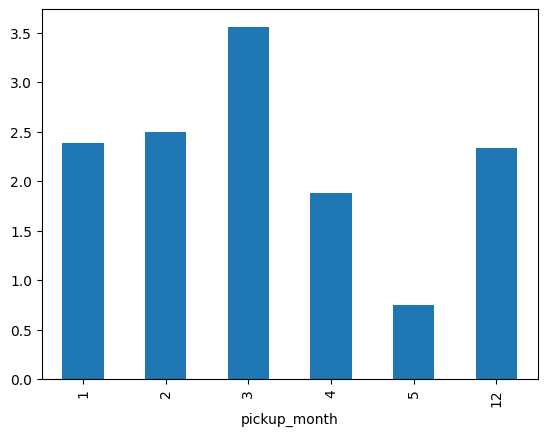

In [41]:
%%timeit -r 1 -n 1

date_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'] 

# File not available in repo, please reach out to author for access
large_df = pd.read_csv('02_yellow_tripdata_2022-01-03.csv', 
                       date_parser = pd.to_datetime,  
                       parse_dates = date_cols)
large_df["tip_by_passenger"] = large_df["tip_amount"] / large_df["passenger_count"]
large_df["tip_by_mile"] = large_df["tip_amount"] / large_df["trip_distance"]
large_df["pickup_month"] = large_df.tpep_pickup_datetime.dt.month
large_df["pickup_day"] = large_df.tpep_pickup_datetime.dt.day
large_df["pickup_day_of_week"] = large_df.tpep_pickup_datetime.dt.dayofweek
large_df.groupby(large_df.pickup_month).tip_amount.mean().sort_index().plot.bar()

In [42]:
import dask.dataframe as dd

/Users/chasehudson/miniforge3/envs/code-dojo/lib/python3.10/site-packages/dask/dataframe/io/csv.py:193: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/Users/chasehudson/miniforge3/envs/code-dojo/lib/python3.10/site-packages/dask/dataframe/io/csv.py:193: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/Users/chasehudson/miniforge3/envs/code-dojo/lib/python3.10/site-packages/dask/dataframe/io/csv.py:193: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


8.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


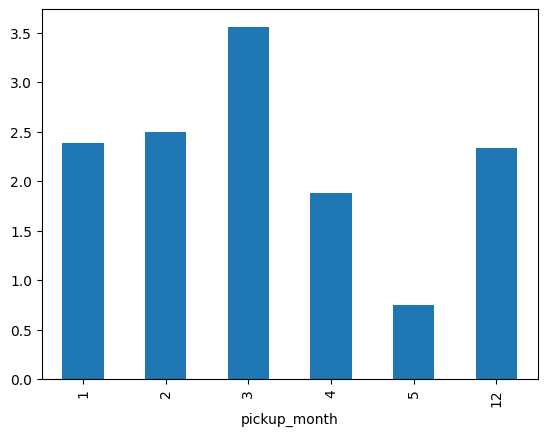

In [43]:
%%timeit -r 1 -n 1
 
# File not available in repo, please reach out to author for access
ddf = dd.read_csv("02_yellow_tripdata_2022-01-03.csv", blocksize=13e7, assume_missing=True)
ddf["tip_by_passenger"] = ddf["tip_amount"] / ddf["passenger_count"]
ddf["tip_by_mile"] = ddf["tip_amount"] / ddf["trip_distance"]
ddf["pickup_month"] = dd.to_datetime(ddf.tpep_pickup_datetime, errors='ignore').dt.month
ddf["pickup_day"] = dd.to_datetime(ddf.tpep_pickup_datetime, errors='ignore').dt.day
ddf["pickup_day_of_week"] = dd.to_datetime(ddf.tpep_pickup_datetime, errors='ignore').dt.dayofweek
ddf.groupby(ddf.pickup_month).tip_amount.mean().compute().sort_index().plot.bar()

## Resources

* [SQL in Pandas](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html)
* [Pandas Merge vs Join](https://stackoverflow.com/a/37891437/9564203)
* [Numpy Docs](https://numpy.org/doc/stable/numpy-user.pdf)
* [Numba & Pandas](https://tedboy.github.io/pandas/enhancingperf/enhancingperf2.html)
* [Chunking in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#use-chunking)
* [Dask & Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#use-other-libraries)
